<font face="Times New Roman" size="10" style='color:red'><b> <center>Principal Component Analysis</font></center></b>

 <font face="Times New Roman" size="5" style='color:black'><b> <center>Dataset USArrest</font></center></b>

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, pearsonr, mode
from statistics import median
import matplotlib.pyplot as plt
import seaborn as sns

## Caricamento dei dati

In [2]:
arrests = pd.read_csv('./dataset/USArrests.csv', index_col=0)
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Descrizione del dataset

Il dataset è composto da 50 campioni, che rappresentano gli Stati americani, e da 4 differenti features:
1. Murder: il numero di arresti per omicidio (ogni 100.000 abitanti)
2. Assault: il numero di arresti per aggressioni (ogni 100.000 abitanti)
3. UrbanPop: la percentuale di popolazione che vive in un'area urbana
4. Rape: il numero di arresti per stupro (ogni 100.000 abitanti)

## Analisi esplorativa delle variabili 

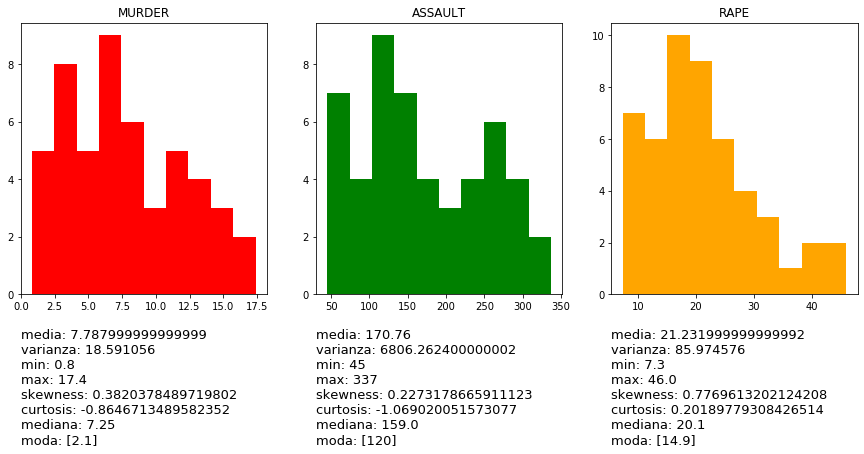

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(arrests.iloc[:, 0], color='red')
axes[0].set_title('Murder'.upper())
axes[0].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(arrests.iloc[:, 0]), np.var(arrests.iloc[:, 0]),
            np.min(arrests.iloc[:, 0]), np.max(arrests.iloc[:, 0]),
            skew(arrests.iloc[:, 0]), kurtosis(arrests.iloc[:, 0]),
            median(arrests.iloc[:, 0]), mode(arrests.iloc[:, 0])[0]),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(arrests.iloc[:, 1], color='green')
axes[1].set_title('Assault'.upper())
axes[1].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(arrests.iloc[:, 1]), np.var(arrests.iloc[:, 1]),
            np.min(arrests.iloc[:, 1]), np.max(arrests.iloc[:, 1]),
            skew(arrests.iloc[:, 1]), kurtosis(arrests.iloc[:, 1]),
            median(arrests.iloc[:, 1]), mode(arrests.iloc[:, 1])[0]),
    fontsize=13,
    transform=axes[1].transAxes,
)

axes[2].hist(arrests.iloc[:, 3], color='orange')
axes[2].set_title('Rape'.upper())
axes[2].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(arrests.iloc[:, 3]), np.var(arrests.iloc[:, 3]),
            np.min(arrests.iloc[:, 3]), np.max(arrests.iloc[:, 3]),
            skew(arrests.iloc[:, 3]), kurtosis(arrests.iloc[:, 3]),
            median(arrests.iloc[:, 3]), mode(arrests.iloc[:, 3])[0]),
    fontsize=13,
    transform=axes[2].transAxes)

plt.show()

**Considerazioni**
1. Nel primo istogramma notiamo un moderato valore di varianza, valore che appare molto *elevato* nel caso del secondo istogramma: questo indica che in quest'ultimo i dati si discostano di molto dalla media aritmetica
2. Notiamo nei primi due grafici un valore di **skewness** (misura della asimmetria) basso: questo indica la quasi assenza di asimmetrie, aspetto che non appare esattamente il medesimo nel *terzo* istogramma, in cui notiamo la presenza di **skewness** più alta rispetto agli altri due 
3. La **curtosi**, che misura la rapidità con cui le code della distribuzione si annullano, appare nei primi due casi negativa: ciò indica che la curva è*platicurtica*, cioè più piatta di una normale; nel terzo istogramma, avendo curtosi positiva, possiamo visualizzare di come la curva sia *leptocurtica*, cioè più appuntita di una normale

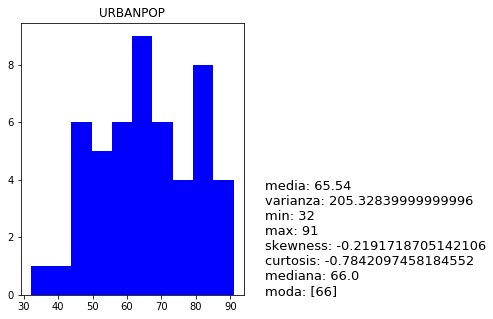

In [4]:
plt.figure(figsize=(4, 5))
plt.hist(arrests.iloc[:, 2], color='blue')
plt.title('UrbanPop'.upper())
plt.text(
    100,
    0,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(arrests.iloc[:, 2]), np.var(arrests.iloc[:, 2]), np.min(arrests.iloc[:, 2]),
            np.max(arrests.iloc[:, 2]), skew(arrests.iloc[:, 2]), kurtosis(arrests.iloc[:, 2]),
            median(arrests.iloc[:, 2]),
            mode(arrests.iloc[:, 2])[0]),
    fontsize=13)

plt.show()

**Considerazioni**
1. La varianza è molto alta in questo caso, pertanto questo indicherà che i valori si discostano di molto rispettivamente dalla media aritmetica 
2. I valori di **skewness** e di **curtosi** sono entrambi negativi: 
    + La **skewness** negativa indica la tendenza alla formazione di una gobba a destra della media: questo aspetto appare poco evidente a causa di tale valore prossimo a *zero*
    + La **curtosi** indica il grado di "appiattimento" di una distribuzione e, in questo caso, la curva si definisce essere platicurtica, cioè più "piatta" di una normale ed è poco concentrata attorno alla media, ultimo aspetto che viene già evidenziato dalla **alta varianza**

## Principal Component Analysis

###  Calcolo della PCA manualmente

#### Analisi delle varianze 

Analizziamo ora le varianze delle features, al fine di capire se utilizzare per la PCA, la matrice di correlazione o la matrice di covarianza

In [5]:
arrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Le varianze delle features sono molto diverse: infatti, per esempio, la variabile *UrbanPop*, la quale misura la percentuale della popolazione in ogni stato che vive in un'area urbana, non è un numero paragonabile al numero di reati commessi in ogni stato per 100.000 individui. Quindi se dovessimo effettuare la PCA avremmo, come risultato, delle **componenti principali** molto influenzate dalla variabile *Assault*, poichè ha varianza (e quindi, in teoria, il potere informativo) maggiore rispetto alle altre variabili.

Ciò che possiamo fare quindi, è quello di standardizzare le variabili, affinchè abbiano **media nulla** e **varianza unitaria**

#### Standardizzazione delle features

In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit_transform(arrests)
X = pd.DataFrame(std, index=arrests.index, columns=arrests.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


Una volta effettuata la standardizzazione delle variabili possiamo passare a calcolare la matrice di covarianza o correlazione: infatti, avendo a che fare con variabili standardizzate, l'uso di una matrice rispetto ad un'altra sarà indifferente. Calcoliamo quindi la matrice di covarianza:

#### Calcolo matrice di covarianza

In [7]:
import numpy as np
C_X = np.cov(X.T)
print('Matrice di covarianza\n')
print(C_X)

Matrice di covarianza

[[1.02040816 0.81823807 0.07099247 0.57508044]
 [0.81823807 1.02040816 0.2641548  0.67881758]
 [0.07099247 0.2641548  1.02040816 0.41973595]
 [0.57508044 0.67881758 0.41973595 1.02040816]]


#### Calcolo degli *autovettori* e degli *autovalori* della matrice di covarianza

In [8]:
eigen_vals, eigen_vecs = np.linalg.eig(C_X)

# Calcolo una lista di tuple (autovalore, autovettore)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Ordino le tuples dalla più alta alla più bassa(autovalore, autovettore)
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
#Creazione della matrice Ad di rotazione (ortogonale) le cui colonne sono i loadings
Ad = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                eigen_pairs[1][1][:, np.newaxis],
                eigen_pairs[2][1][:, np.newaxis],
                eigen_pairs[3][1][:, np.newaxis]))
pd.DataFrame(Ad, columns=['Loading1', 'Loading2', 'Loading3', 'Loading4'], index=['Murder', 'Assault', 'UrbanPop', 'Rape'])

,Loading1,Loading2,Loading3,Loading4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


#### Calcolo delle PCs 

In [10]:
#calcolo gli scores, quindi le componenti principali e visualizzo le prime 5 righe
Y=(X).dot(Ad)
pd.DataFrame(Y.values, columns=['PC1', 'PC2', 'PC3', 'PC4']).head()

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


**Nota**:
- Abbiamo ordinato le componenti principali in base alla grandezza degli autovalori

### Calcolo della PCA tramite la funzione built-in di Python

#### Calcolo delle PCs

In [11]:
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=X.columns)
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), index=arrests.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


**Considerazioni**:
+ Osserviamo la presenza di 4 distinte componenti principali.


#### Calcolo dei loadings

In [12]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T,
                            index=X.columns,
                            columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


Possiamo osservare di come i loadings calcolati con il metodo built-in di Python coincidano con quelli calcolati con il metodo *manuale*

### Cerchio di correlazione

Andiamo a costruire per prima cosa la **matrice di correlazione** fra le **features** e le **PCs**

In [15]:
#costruzione della matrice di correlazione fra le features e le PCs
corr_matrix = np.zeros((4,4))
for i in range(0, df_plot.shape[1]):
    for j in range(0, X.shape[1]):
        coeff = pearsonr(df_plot.iloc[:, i], X.iloc[:, j])
        corr_matrix[j][i] = coeff[0]#sulle colonne le componenti principali
pd.DataFrame(corr_matrix, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
Murder,0.843976,0.416035,-0.203760,0.270371
Assault,0.918443,0.187021,-0.160119,-0.309592
UrbanPop,0.438117,-0.868328,-0.225724,0.055753
Rape,0.855839,-0.166460,0.488319,0.037074


**Considerazioni**:
1. I pesi maggiori sulla prima componente principale sono su *Murder*, *Assault*, *Rape*: a riconferma di quanto affermato prima, tale componente potrebbe quindi essere interpretata come una **misura generale del crimine**
2. Sulla seconda componente principale la variabile *UrbanPop* ha maggior peso in termini assoluti: a riconferma di quanto affermato prima, tale componente potrebbe essere interpretata come il **livello di urbanizzazione**

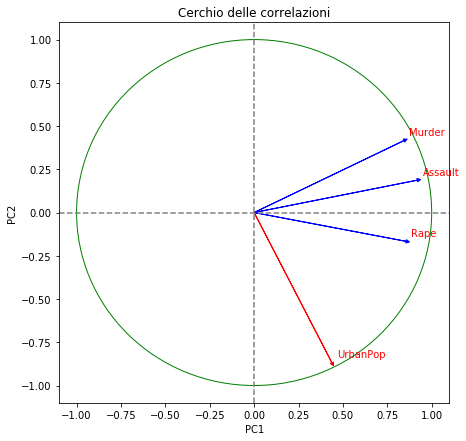

In [16]:
fig , ax1 = plt.subplots(figsize=(7, 7))
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
circle = plt.Circle((0, 0), 1, fill=False, color='green')
ax1.add_artist(circle)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Cerchio delle correlazioni')
ax1.plot(np.linspace(-1.1, 1.1, 50), np.linspace(0, 0, 50), '--', color='grey')
ax1.plot(np.linspace(0, 0, 50), np.linspace(-1.1, 1.1, 50), '--', color='grey')

ax1.arrow(0, 0, corr_matrix[0][0],  corr_matrix[0][1], color='blue', head_width=0.02,head_length=0.02)
ax1.annotate(s=X.columns[0], xy=(corr_matrix[0][0] + 0.03,  corr_matrix[0][1] + 0.03), color='red')

ax1.arrow(0, 0, corr_matrix[1][0],  corr_matrix[1][1], color='blue', head_width=0.02,head_length=0.02)
ax1.annotate(s=X.columns[1], xy=(corr_matrix[1][0] + 0.03,  corr_matrix[1][1] + 0.03), color='red')

ax1.arrow(0, 0, corr_matrix[2][0],  corr_matrix[2][1], color='red', head_width=0.02,head_length=0.02)
ax1.annotate(s=X.columns[2], xy=(corr_matrix[2][0] + 0.03,  corr_matrix[2][1] + 0.03), color='red')

ax1.arrow(0, 0, corr_matrix[3][0],  corr_matrix[3][1], color='blue', head_width=0.02,head_length=0.02)
ax1.annotate(s=X.columns[3], xy=(corr_matrix[3][0] + 0.03,  corr_matrix[3][1] + 0.03), color='red')

plt.show()

**Considerazioni**
- Nel cerchio notiamo la rappresentazione delle features sulla base del proprio contributo al fine della creazione delle due componenti principali
- Notiamo di come le variabili che indicano i reati (*Murder, Assault e Rape*) contribuiscono maggiormente alla **PC1**, poichè sono più vicine all'*asse x*
- Mentre la feature *UrbanPop* influenza maggiormente la **PC2**

Potremmo quindi interpretare le nuove componenti principali ottenute come:
1. Un indice di **criminalità** (per quando riguarda le variabili *Murder, Assault, Rape*)
2. Un indice di **urbanizzazione** (per quanto riguarda *UrbanPop*)


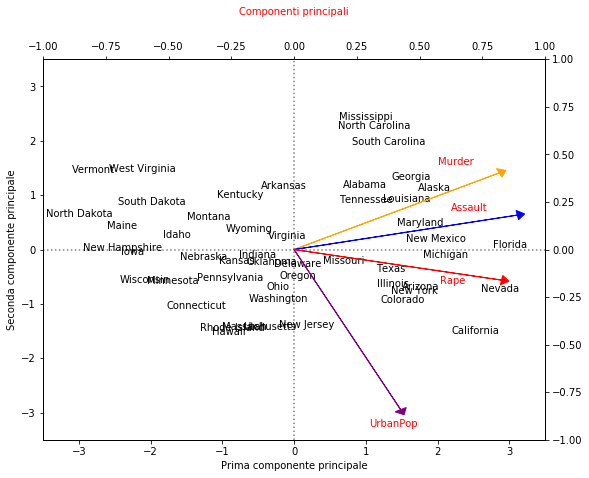

In [17]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], df_plot.PC2.loc[i]), ha='center')
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('Prima componente principale')
ax1.set_ylabel('Seconda componente principale')
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Componenti principali\n\n', color='red')
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='red')
ax2.arrow(0,0, corr_matrix[0][0],  corr_matrix[0][1], color='orange', length_includes_head=True,
          head_width=0.05, head_length=0.03)
ax2.arrow(0,0, corr_matrix[1][0],  corr_matrix[1][1], color='blue', length_includes_head=True,
          head_width=0.05, head_length=0.03)
ax2.arrow(0,0, corr_matrix[2][0],  corr_matrix[2][1], color='purple', length_includes_head=True,
          head_width=0.05, head_length=0.03)
ax2.arrow(0,0, corr_matrix[3][0],  corr_matrix[3][1], color='red', length_includes_head=True,
          head_width=0.05, head_length=0.03)

plt.show()

**Considerazioni**:
+ In questo grafico le osservazioni sono rappresentate nel piano delle prime due componenti principali.  Il grafico contiene anche **4** frecce corrispondenti alle variabili rilevate
+ La lunghezza delle frecce rappresenta la *varianza* delle variabili osservate, mentre gli angoli tra le frecce rappresentano la correlazione tra le stesse
+ Dove troviamo angoli di ampiezza inferiore avremo maggiore correlazione
+ Nel nostro caso quindi *UrbanPop* ha un peso maggiore sulla *seconda componente principale*, mentre le altre tre variabili (*Murder,Assault,Rape*) hanno peso maggiore sulla *prima componente principale*
+ La PC1 corrisponde approssimativamente al tasso di reati gravi. Stati come la *California*, la *Florida* e il *Nevada* hanno un alto tasso di reati gravi, mentre stati come il *Nord Dakota* e il *Vermont* hanno un tasso molto più basso.
+ La PC2, che rappresenta il livello di urbanizzazione, ci mostra di come stati come la *California* siano altamente urbanizzati, mentre altri, come *Mississippi* e *Carolina*, lo siano molto meno




### Percentuale di varianza spiegata

#### Da ogni singola PCs

In [ ]:
pca.explained_variance_ratio_

Calcoliamo la varianza di ogni singola PCs:

In [18]:
print(pca.explained_variance_)

[2.53085875 1.00996444 0.36383998 0.17696948]


E verifichiamo che la varianza di ogni singola PCs coincida con gli autovalori della matrice di covarianza:

In [19]:
print(f'{[eigen_pairs[i][0] for i in range(len(eigen_pairs))]}')

[2.5308587542341776, 1.0099644413671853, 0.36383998018452035, 0.17696947727534232]


#### Percentuale cumulativa di varianza spiegata

Se adottassimo come euristica la **percentuale** cumulativa della varianza totale spiegata, impostando un valore cut-off tra 80-90%, sceglieremmo le prime due componenti principali:

In [20]:
print('Percentuale di varianza spiegata', np.cumsum(pca.explained_variance_ratio_))

Percentuale di varianza spiegata [0.62006039 0.86750168 0.95664248 1.        ]


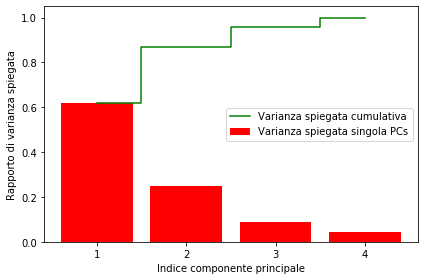

In [21]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
tot = sum(eigen_vals)
varianza_spiegata = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(varianza_spiegata)
plt.bar([1,2,3,4],
        varianza_spiegata,
        align='center',
        label='Varianza spiegata singola PCs',
        color='red')
plt.step([1,2,3,4],
         cum_var_exp,
         color='green',
         where='mid',
         label='Varianza spiegata cumulativa')
plt.ylabel("Rapporto di varianza spiegata")
plt.xlabel("Indice componente principale")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Considerazioni**:
- I *barplot* indicano le componenti principali(gli indici), mentre la linea in *verde* indica la varianza spiegata cumulativa
- Possiamo visualizzare graficamente di come la prima componente principale spieghi il 62% di varianza, mentre le prime due componenti principali spieghino circa l'87% della varianza

### Scree Plot

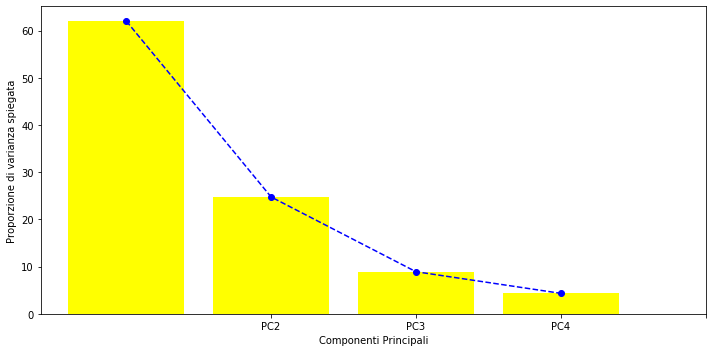

In [22]:
var_exp = pca.explained_variance_ratio_ * 100
plt.figure(figsize=(10,5))
plt.bar(df_plot.columns, var_exp, color='yellow')
plt.plot(df_plot.columns, var_exp, 'o--', color='blue')
plt.ylabel('Proporzione di varianza spiegata')
plt.xlabel('Componenti Principali')
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

Quindi la prima componente principale spiega il 62% della varianza nei dati, la seconda componente principale circa il 25% della varianza totale e così via.

### Regola di Kaiser

- Attraverso la *regola di Kaiser*, nel caso in cui utilizziamo la **matrice di covarianza** sono scelte le componenti principali la cui varianza è maggiore dell'autovalore **medio**, cioè: $$\lambda_{k} > \overline{\lambda}=\frac{1}{p}\sum_{i=1}^{p}\lambda_{i}$$
- Invece, nel caso stessimo utilizzando la **matrice di correlazione** per ottenere le PCs, dovremmo considerare le componenti che hanno varianza maggiore dell'unità, ovvero:$$\lambda_{k}>1$$
- In questo caso, poichè utilizziamo dati *standardizzati*, essendo indifferente scegliere una matrice piuttosto che un'altra, possiamo considerare il caso in cui le componenti abbiano varianza maggiore dell' unità


In [23]:
pd.DataFrame(pca.explained_variance_, index=range(1,5), columns=['Varianza']).where(lambda x: x>1).dropna().T

,1,2
Varianza,2.530859,1.009964


**Considerazioni**:
1. Notiamo di come **due** componenti principali bastino per esprimere la maggior parte della varianza dei dati